In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
rcParams.update({'font.size': 18})


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import data needed
# grid data

CRindir = '/Users/sclayton/Google Drive/work/comparison/data/CRgrid'

#import grid params for CR grid

in_file = '%s/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)[0,:,:]

in_file = '%s/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%s/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)


In [3]:
# phyto, PP, zoo, MLD, NO3
# CR data
CR_P = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPhyto.monthly.1999.data', dtype = '>f')
CR_P = CR_P.reshape(12, 160, 360)
CR_PP = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPP.monthly.1999.data', dtype = '>f')
CR_PP = CR_PP.reshape(12, 160, 360)
CR_mld = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/mld.monthly.1999.data', dtype = '>f')
CR_mld = CR_mld.reshape(12, 160, 360)
CR_sst = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/annual/CR/Theta.1999.data', dtype = '>f')

CR_sst = CR_sst.reshape(23, 160, 360)[0,:,:]

# ['phyto', 'pp', 'zoo','nit','mld']
to_c = 106*12/1000
s_y = 106*12/1000*60*60*24*365 # mmol C m^-2 day^-1

phy = np.nanmean(CR_P, axis=0)*to_c
pp = np.nanmean(CR_PP, axis=0)*s_y
mld = np.nanmean(CR_mld, axis=0)



/Users/sclayton/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


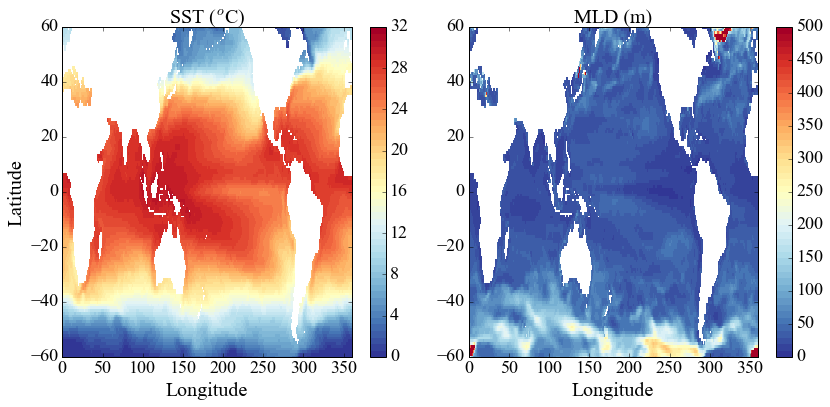

In [4]:
# SST and MLD figure
SST = ma.masked_where(HFCR == 0, CR_sst, copy=False)
MLD = ma.masked_where(HFCR == 0, mld, copy=False)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12, 6), dpi = 600)
palette = plt.get_cmap('RdYlBu_r', 50)

ss = ax1.pcolormesh(XC, YC, SST,shading='flat', vmin= 0, vmax = 32, cmap = palette)
ax1.axis([0, 360, -60, 60])
fig.colorbar(ss, ax=ax1)
ax1.set_xlabel('Longitude', fontsize = 20)
ax1.set_ylabel('Latitude', fontsize = 20)
ax1.set_title('SST ($^o$C)', fontsize = 20)

mm = ax2.pcolormesh(XC, YC, MLD,shading='flat', vmin= 0, vmax = 500, cmap = palette)
ax2.axis([0, 360, -60, 60])
fig.colorbar(mm, ax=ax2)
ax2.set_xlabel('Longitude', fontsize = 20)
ax2.set_title('MLD (m)', fontsize = 20)

plt.show()

fig.savefig('/Users/sclayton/Google Drive/work/comparison/final/figures/S1.png', dpi=600)

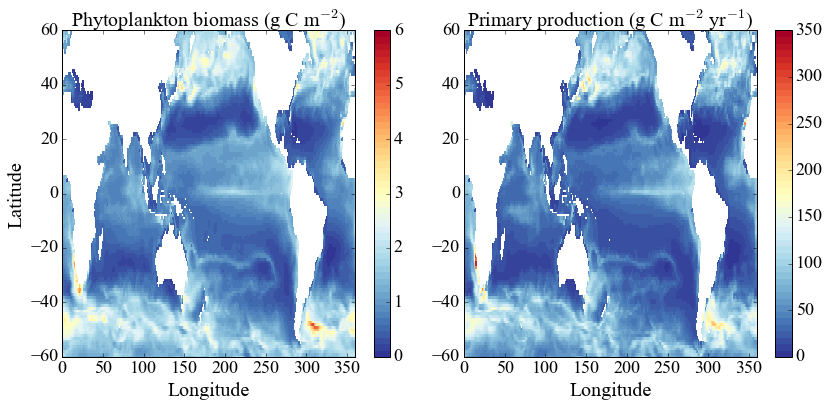

In [11]:
# PP and P figure

# SST and MLD figure
PP = ma.masked_where(HFCR == 0, pp, copy=False)
P = ma.masked_where(HFCR == 0, phy, copy=False)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12, 6), dpi = 600)
palette = plt.get_cmap('RdYlBu_r', 50)

p = ax1.pcolormesh(XC, YC, P,shading='flat', vmin= 0, vmax = 6, cmap = palette)
ax1.axis([0, 360, -60, 60])
cb = fig.colorbar(p, ax=ax1)
cb.set_ticks([0, 1, 2, 3, 4, 5, 6])
ax1.set_xlabel('Longitude', fontsize = 20)
ax1.set_ylabel('Latitude', fontsize = 20)
ax1.set_title('Phytoplankton biomass (g C m$^{-2}$)', fontsize = 20)

ppp = ax2.pcolormesh(XC, YC, PP,shading='flat', vmin= 0, vmax = 350, cmap = palette)
ax2.axis([0, 360, -60, 60])
cc = fig.colorbar(ppp, ax=ax2)
cc.set_ticks([0, 50, 100, 150, 200, 250, 300, 350])
ax2.set_xlabel('Longitude', fontsize = 20)
ax2.set_title('Primary production (g C m$^{-2}$ yr$^{-1}$)', fontsize = 20)

plt.show()

fig.savefig('/Users/sclayton/Google Drive/work/comparison/final/figures/S2.png', dpi=600)